In [1]:
import sqlite3
import pandas
con = sqlite3.connect('coal.db')
labels = pandas.read_sql("select orispl_code, unitid from data group by orispl_code, unitid", con)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
names = {}
for i, row in labels.iterrows():
    key = (row['orispl_code'], row['unitid'])
    for year in range(2001, 2017):
        plt.gcf().clear()
        frame = pandas.read_csv('cf/' + str(row['orispl_code']) + '_' + row['unitid'] + '_' + str(year) + '.csv')
        if len(frame.name) is 0: continue
        name = frame.name[0]
        names[key] = name
        data = frame.capacity_factor
        plt.hist(data, bins=np.linspace(0, 1, 10))
        plt.xlabel('Capacity factor - hourly generation / max hourly generation')
        plt.ylabel('Frequency')
        plt.title('Capacity Factors at ' + name + ', unit ' + row['unitid'] + ' in ' + str(year))
        plt.savefig('cf/' + str(row['orispl_code']) + '_' + row['unitid'] + '_' + str(year) + '.png')

In [18]:
data = {}
for i, row in labels.iterrows():
    key = (names[(row['orispl_code'], row['unitid'])], row['unitid'])
    data[key] = {}
    for year in range(2001, 2017):
        frame = pandas.read_csv('cf/' + str(row['orispl_code']) + '_' + row['unitid'] + '_' + str(year) + '.csv')
        col = frame.capacity_factor
        if len(col) is 0: continue
        data[key][year] = (np.average(col), np.std(col), np.std(col/np.average(col)))

In [35]:
avg_decreased = 0
avg_increased = 0
var_decreased = 0
var_increased = 0
went_online = 0
went_offline = 0
stds = []
avgs = []
for unit in data:
    disregard = False
    if 2001 not in data[unit]:
        disregard = True
        went_online += 1
    if 2016 not in data[unit]:
        disregard = True
        went_offline += 1
    if disregard: continue
    min_year =  data[unit][2001]
    max_year = data[unit][2016]
    stds.append(max_year[1] - min_year[1])
    avgs.append(max_year[0] - min_year[0])
    if max_year[0] < min_year[0]:
        avg_decreased += 1
    else:
        avg_increased += 1
    if max_year[1] > min_year[1]:
        var_increased += 1
    else:
        var_decreased += 1
print "Average capacity factor decreased in this many units: " + str(avg_decreased)
print "Average capacity factor increased in this many units: " + str(avg_increased)
print "Std of capacity factor decreased in this many units: " + str(var_decreased)
print "Std of capacity factor increased in this many units: " + str(var_increased)
print "This many went offline: " + str(went_offline)
print "And this many came on: " + str(went_online)


Average capacity factor decreased in this many units: 66
Average capacity factor increased in this many units: 7
Std of capacity factor decreased in this many units: 35
Std of capacity factor increased in this many units: 38
This many went offline: 18
And this many came on: 11


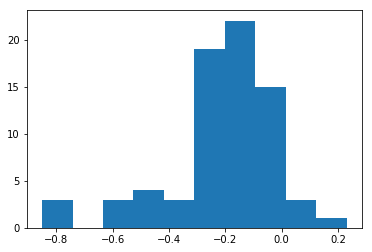

In [28]:
plt.gcf().clear()
plt.hist(avgs)
plt.show()

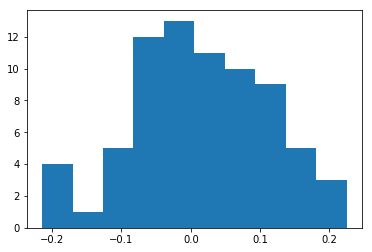

In [36]:
plt.gcf().clear()
plt.hist(stds)
plt.show()